In [1]:
using Pkg

# Activate the project at the repo root
Pkg.activate("..")

# (Optional but recommended)
Pkg.instantiate()

using TrafficNetworks

  Activating project at `c:\Skole\V26\masteroppgave\github_code_master_thesis\master_thesis`
┌ Warning: The project dependencies or compat requirements have changed since the manifest was last resolved.
│ It is recommended to `Pkg.resolve()` or consider `Pkg.update()` if necessary.
└ @ Pkg.API C:\Users\linde\.julia\juliaup\julia-1.12.4+0.x64.w64.mingw32\share\julia\stdlib\v1.12\Pkg\src\API.jl:1308


In [13]:
# Test basic flux properties
println("flux(0.0) = ", TrafficNetworks.Fluxes.flux(0.0))
println("flux(0.5) = ", TrafficNetworks.Fluxes.flux(0.5))
println("flux(1.0) = ", TrafficNetworks.Fluxes.flux(1.0))

println("godunov_flux(0.2, 0.8) = ", TrafficNetworks.Fluxes.godunov_flux(0.2, 0.8))
println("godunov_flux(0.8, 0.2) = ", TrafficNetworks.Fluxes.godunov_flux(0.8, 0.2))

flux(0.0) = 0.0
flux(0.5) = 0.25
flux(1.0) = 0.0
godunov_flux(0.2, 0.8) = 0.15999999999999998
godunov_flux(0.8, 0.2) = 0.16000000000000003


In [35]:
# Initial condition
rho0(x) = 0.4 + 0.1 * sin(2π * x)

# Build road
road = make_road(
    1,      # id
    1.0,    # length
    10000,    # number of cells
    rho0
)

println("Road created:")
println("  dx = ", road.dx)
println("  rho range = (",
    minimum(road.rho), ", ",
    maximum(road.rho), ")")


Road created:
  dx = 0.0001
  rho range = (0.30000000493480217, 0.4999999950651979)


In [36]:
net = RoadNetwork(
    [road],        # roads
    Junction[],    # no junctions
    Boundary[],    # no boundaries
    0.5,           # final time
    0.9            # CFL
)

println("RoadNetwork created")


RoadNetwork created


In [37]:
simulate!(net)

println("Simulation finished")
println("Final rho range = (",
    minimum(road.rho), ", ",
    maximum(road.rho), ")")


Simulation finished
Final rho range = (0.0, 1.0)


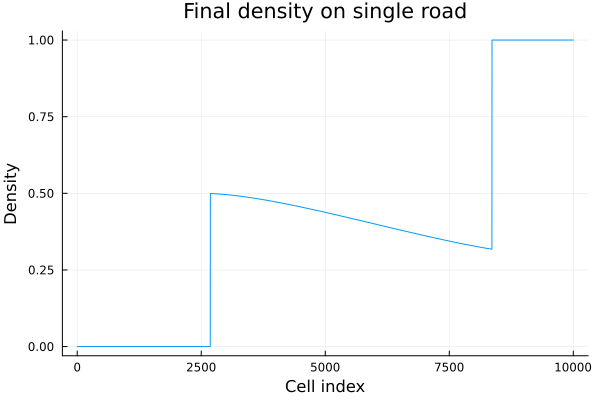

In [38]:
using Plots

plot(
    road.rho,
    xlabel = "Cell index",
    ylabel = "Density",
    title = "Final density on single road",
    legend = false
)


In [22]:
dt = cfl_dt(road, 0.9)
println("Current CFL timestep estimate dt = ", dt)


UndefVarError: UndefVarError: `cfl_dt` not defined in `Main`
Suggestion: check for spelling errors or missing imports.